<a href="https://colab.research.google.com/github/haedal-uni/analysis/blob/main/work/2025-04/%EB%A1%9C%EB%B3%B4%EC%96%B4%EB%93%9C%EB%B0%94%EC%9D%B4%EC%A0%80/%EB%B3%80%ED%99%94%EC%9C%A8%20%EA%B8%B0%EC%A4%80%20%EB%8B%A8%EC%88%9C%20%EB%A7%A4%EB%A7%A4%20%EC%8B%9C%EA%B7%B8%EB%84%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import matplotlib
import sys
import numpy as np
import os
import pandas as pd
warnings.filterwarnings(action='ignore')
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
matplotlib.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# gpt _ 간단한 로드어드바이저 코드 작성
df = pd.read_csv('미국 철강 코일 선물 과거 데이터.csv', parse_dates=['날짜'], index_col="날짜", thousands=",")
df['거래량'] = df['거래량'].apply(lambda x: float(x.replace('K', '')) * 1000 if isinstance(x, str) and 'K' in x else float(x))
df['변동 %'] = df['변동 %'].apply(lambda x: float(x.replace('%', '')) / 100 if isinstance(x, str) else x)
df = df.sort_index()
df.dropna(inplace=True)

# 전일 종가와 비교하여 상승/하락 여부 판단
def trading_signal(df, threshold=1.0):
    df['변화율'] = df['종가'].pct_change() * 100  # 종가 변화율 계산
    df['신호'] = df['변화율'].apply(lambda x: '매수' if x >= threshold else ('매도' if x <= -threshold else '보유'))
    return df[['종가', '변화율', '신호']]

# 로드 어드바이저 실행
signal_df = trading_signal(df)

# 결과 출력
print(signal_df)


Selecting previously unselected package fonts-nanum.
(Reading database ... 126213 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
               종가        변화율  신호
날짜                              
2015-01-07  597.0        NaN  보유
2015-01-09  594.0  -0.502513  보유
2015-01-30  550.0  -7.407407  매도
2015-02-02  550.0   0.000000  보유
2015-03-30  475.0 -13.636364  매도
...           ...        ...  ..
2025-04-01  895.0   0.561798  보유
2025-04-02  915.0   2.234637  매수
2025-04-03  913.0  -0.218579  보유
2025-04-04  932.0   2.081051  매수
2025-04-07  930.0  -0.214592  보유

[1679 rows x 3 columns]


<Axes: >

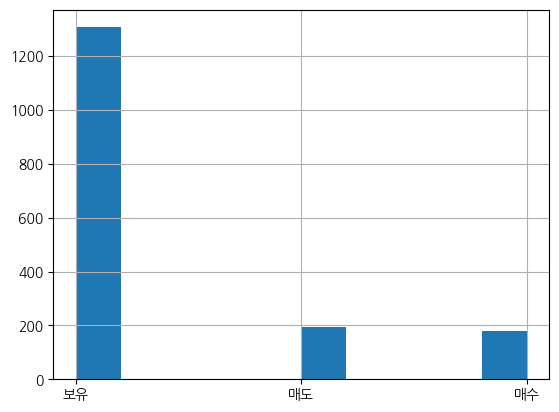

In [ ]:
df['신호'].hist()